In [ ]:
pip install tensorflow scikit-learn numpy pandas


In [ ]:
pip install tslearn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 6.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import pandas as pd
import tensorflow_datasets as tfds
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout


In [ ]:
categories = [
    'alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware',
    'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale',
    'rec.autos', 'rec.motorcycles'
]

In [ ]:
newsgroups = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))



In [ ]:
text = newsgroups.data
classes = newsgroups.target

In [ ]:
encoder = LabelEncoder()
encoded_classes = encoder.fit_transform(classes)

In [ ]:
#  Tokenize text
max_words = 10000  # Limit on the number of words/features
maxlen = 500       # Max length of each input sequence
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(text)
sequences = tokenizer.texts_to_sequences(text)
X = pad_sequences(sequences, maxlen=maxlen)
Y = np.array(encoded_classes)

In [ ]:
#  Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=maxlen))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(categories), activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ ?                           │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, Y_train,
                    epochs=20,
                    batch_size=64,
                    validation_split=0.1)

Epoch 1/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 44s 421ms/step - accuracy: 0.1348 - loss: 2.1900 - val_accuracy: 0.2905 - val_loss: 1.9993
Epoch 2/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 44s 452ms/step - accuracy: 0.3971 - loss: 1.8147 - val_accuracy: 0.6171 - val_loss: 1.2118
Epoch 3/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 40s 410ms/step - accuracy: 0.6515 - loss: 1.0870 - val_accuracy: 0.6864 - val_loss: 0.9150
Epoch 4/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 45s 456ms/step - accuracy: 0.7917 - loss: 0.6939 - val_accuracy: 0.7370 - val_loss: 0.8080
Epoch 5/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 42s 429ms/step - accuracy: 0.8598 - loss: 0.4867 - val_accuracy: 0.7399 - val_loss: 0.7916
Epoch 6/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 83s 443ms/step - accuracy: 0.8973 - loss: 0.3676 - val_accuracy: 0.7486 - val_loss: 0.7874
Epoch 7/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 417ms/step - accuracy: 0.9251 - loss: 0.2679 - val_accuracy: 0.7572 - val_loss: 0.8059
Epoch 8/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 421ms/step - accuracy: 0.9447 - loss: 0.2025 - val_accu

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {accuracy:.4f}")

55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.7547 - loss: 1.2366
Test Accuracy: 0.7470


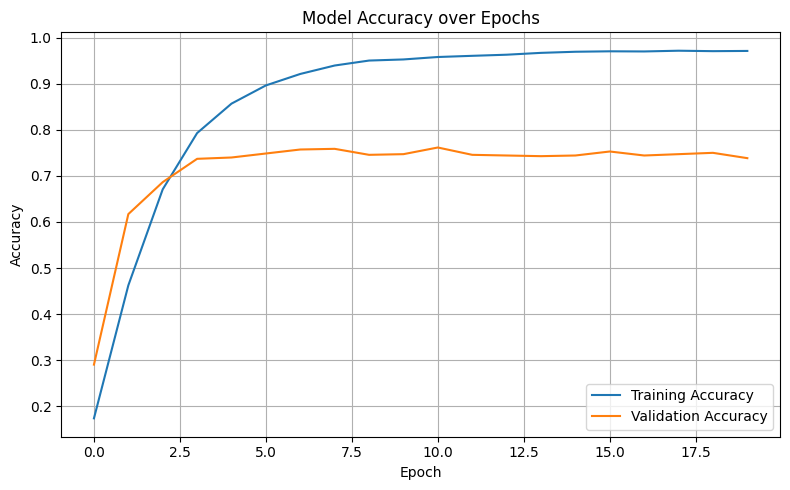

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()
